# Task-3 Graduate Rotational Internship Program (GRIP - Feb 2021) organised by The Sparks Foundation.
### Author: Saurabh Paliwal (Intern June 2021)
# Exploratory Data Analysis - Retail

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
### Aim: To find the weak areas which affects the company profit

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.express as px
import plotly.graph_objects as go
# !pip install pywaffle
# import pywaffle
from plotly.subplots import make_subplots
# from pywaffle import Waffle

In [4]:
df = pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 13)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [13]:
df=df.drop(columns=['Postal Code','Country'])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
df.duplicated().sum()

50

In [15]:
df.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [16]:
df.duplicated().count()

9994

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

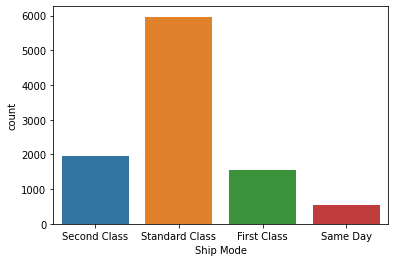

In [17]:
sns.countplot('Ship Mode', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Segment', ylabel='count'>

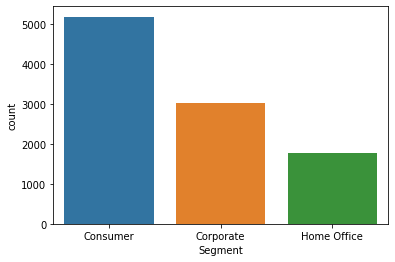

In [18]:
sns.countplot('Segment', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel='count'>

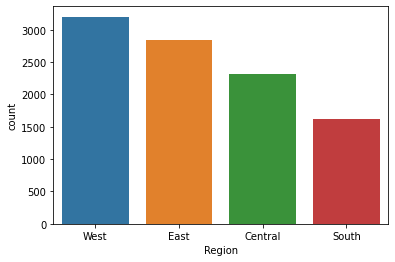

In [19]:
sns.countplot('Region', data=df, order = df['Region'].value_counts().index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

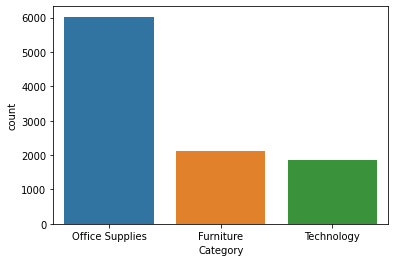

In [20]:
sns.countplot('Category', data=df, order = df['Category'].value_counts().index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

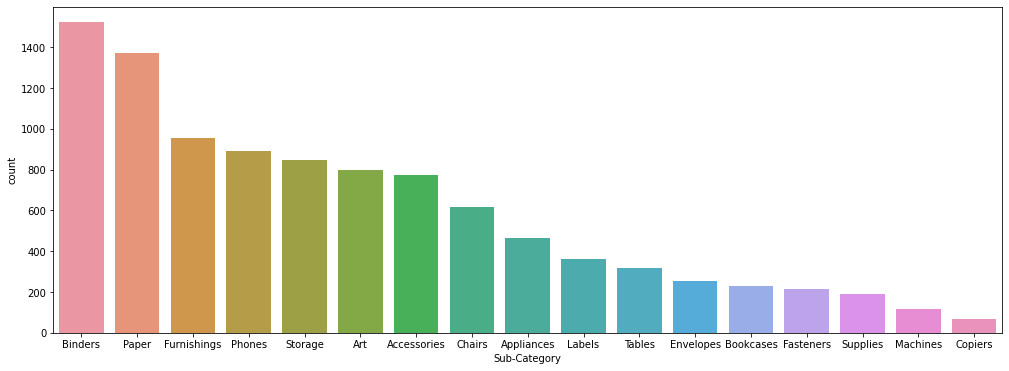

In [21]:
plt.figure(figsize=(17,6))
sns.countplot('Sub-Category', data=df, order = df['Sub-Category'].value_counts().index)

In [22]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

<AxesSubplot:>

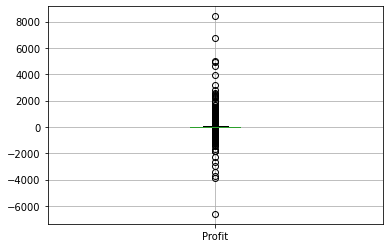

In [23]:
df.boxplot(column=['Profit'])

In [24]:
print(df['Profit'].skew())

7.561431562468343


The skewness value of 7.5 shows that the variable 'Profit' has a right-skewed distribution, indicating the presence of extreme higher values.

We will cap our outliers to 10th and 90th percentile

In [25]:
print(df['Profit'].quantile(0.10))
print(df['Profit'].quantile(0.90))

-15.47346
89.28162000000006


In [26]:
df['Profit'] = np.where(df['Profit'] < -15.47346, -15.47346, df['Profit'])
df['Profit'] = np.where(df['Profit'] > 89.2816, 89.2816, df['Profit'])
print(df['Profit'].skew())

1.178539916829514


In [27]:
state_short = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_short'] = df.State.apply(lambda x: state_short[x])

# Exploratory Data Analysis

Now, we will perform EDA on our dataset, with an aim to uncover the hidden trends within the data which might help the superstore to increase their profits.

First, let's have a look at the total sales per state and the revenue generated.

In [28]:
state_data = df[['Sales', 'Profit', 'state_short']].groupby(['state_short']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

(1) The company has the highest sales in the state of California (shown in dark maroon), selling around $450K of goods.

(2) New York (bright red, top right) is the state with the second highest sales, with more that $300k worth of goods sold.

(3) The states of Texas (bottom-most, orange) and Washington (top left, orange) end up third and fourth on the top sales charts with around $170K and 140K in sales respectively.

(4) If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region.

(5) The state of West Virginia is the state with the lowest sales, with $1209 worth of goods. Here we have to increase our sales to increase our profit. By changing the market strategy we can improve our sales.

In fact, the total sales in the state of New York is more than the sales in all of the Central America combined.

In [29]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=600,
)

fig.show()

1. Newyork, California and Washington are the most profitable states for the company with the revenue over $50K
2. The states in teal and blue, with an average profit of around Doller 25K are mostly situated in the north-east and south-east region.
3. The Wyoming state is the least profitable state in the united states 

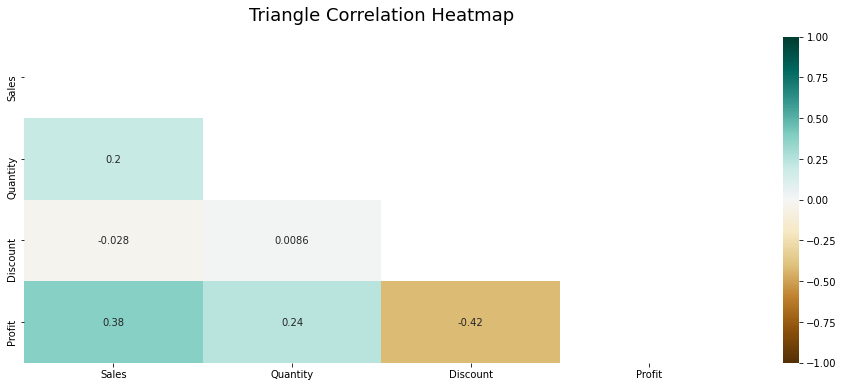

In [30]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

1.There is a Negative Correlation between Profit and Discount. (Discount Increase Profit Decreases)

2.There is a Negative Correlation between Sales and Discount. (Sales Increase Discount Decreases)

3.Nearly no correlation between Quantity and Discount. (0 Correlation)

4.There is a positive Correlation between Sales and Profit. (Sales Increase Profit Increases)

5.There is a positive Correlation between Quantity and Profit. (Quantity Increase Profit Increases)

array([<AxesSubplot:title={'center':'Profit'}, xlabel='Segment'>],
      dtype=object)

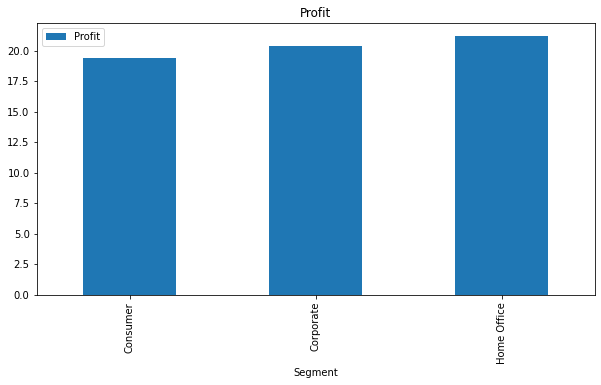

In [31]:
a = pd.pivot_table(df, index='Segment', values='Profit')
a.plot(kind = 'bar', subplots=True, figsize=(10,5))

array([<AxesSubplot:title={'center':'Profit'}, xlabel='Category'>],
      dtype=object)

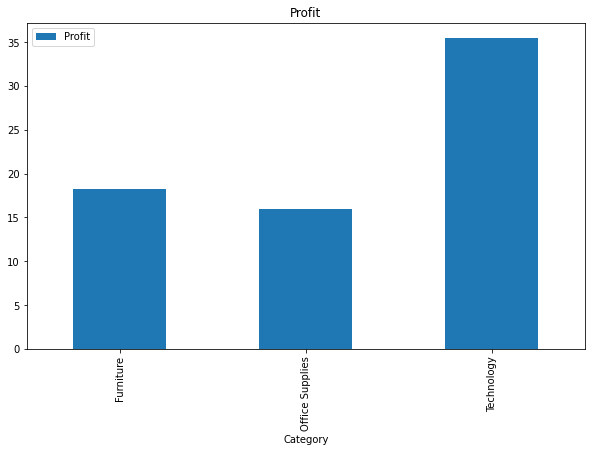

In [32]:
Category = pd.pivot_table(df, index='Category', values='Profit')
Category.plot(kind='bar',subplots=True, figsize=(10,6))

<AxesSubplot:xlabel='Sub-Category'>

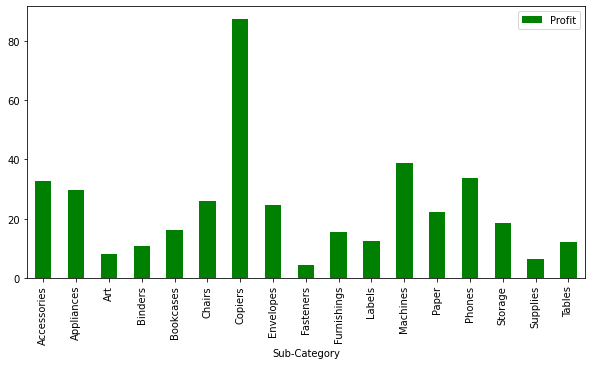

In [33]:
Category = pd.pivot_table(df, index='Sub-Category', values='Profit')
Category.plot(kind = 'bar', color='Green', figsize=(10,5), fontsize=10)


<AxesSubplot:xlabel='Sub-Category'>

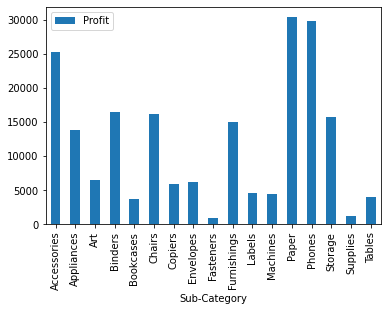

In [34]:
df_items = df[["Sub-Category", "Profit"]]
df_items.groupby("Sub-Category").sum().plot(kind="bar")

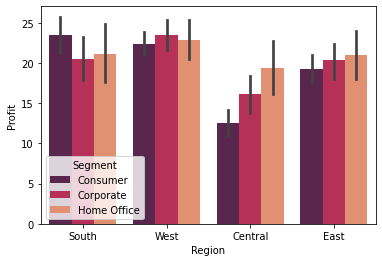

In [35]:
sns.barplot(data = df, x='Region', y='Profit', hue= 'Segment', palette='rocket' )
plt.show()

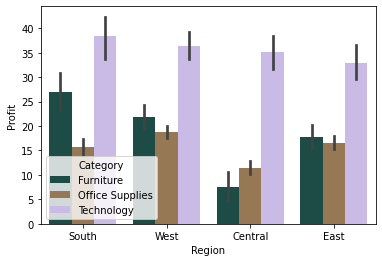

In [36]:
sns.barplot(data = df, x='Region', y='Profit', hue= 'Category', palette='cubehelix')
plt.show()

# LinePlots of Quantity and Discount with Profits

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



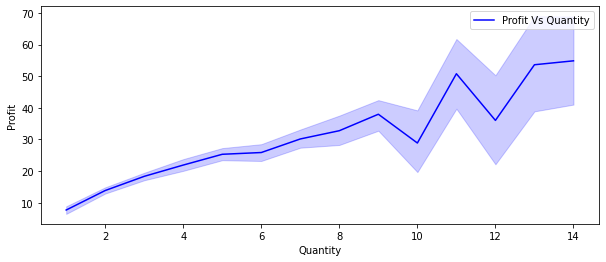

In [37]:
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = df, color = 'b', label= 'Profit Vs Quantity')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



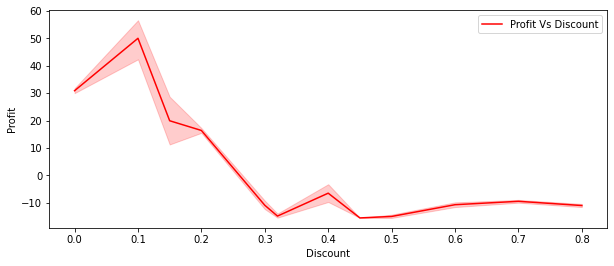

In [38]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df, color = 'r', label= 'Profit Vs Discount')
plt.legend()

# Conclusion

* Superstore faces most of their losses in Wyoming because of high discounts
* Due to high discount there is increase in sales but profit falls down
* As soon as Superstore increases its quality from customers feedback, which results in increase in profit
* Technological items such as phones, accesories sold most in every region
* Furniture items has lowest sales in central Region
* California has highest sales among all the states
* Discounts can increase the sales but over-discounts lead to loss of company
* By using customer feedback, increasing quality, changing marketing strategy we can increase profit of company